# Homework 1 - Reid Empey - Econ 213R

## Step 1

Wow, setting up and trying to understand Git and GitHub is almost a class unto itself, but I think I finally figured things out enough to commit code for the purposes of this class. I already installed Anaconda earlier on in the semester, so that's it for Step 1! On to the data munging...

## Step 2

As per the assignment, we have to get data from 3 different sources, and from three different formats. I've chosen to find and use data from CSV, JSON, and Excel. Let's get to it.

### CSV (technically the dataset I found was .txt, but it's comma delimited)
I found an interesting database called the US Dept. of Agriculture's PLANTS Database, and I wanted to see how many different plant families there are in the database, and what their relative size is to each other (eg, which families are the biggest, by how much, etc).

Luckily, the first row in this dataset contains the names of all the columns, and so I don't have to pass in the names as a separate argument.

In [1]:
import numpy as np
import pandas as pd
plantsCSV = pd.read_csv("https://www.plants.usda.gov/java/downloadData?fileName=plantlst.txt&static=true", header=0)

Great, no errors, so let's take a look at the first few rows to get a feel for how well it was brought into the data frame.

In [2]:
plantsCSV.head(5)

,Symbol,Synonym Symbol,Scientific Name with Author,Common Name,Family
0,ABAB,NaN,Abutilon abutiloides (Jacq.) Garcke ex Hochr.,shrubby Indian mallow,Malvaceae
1,ABAB,ABAM5,Abutilon americanum (L.) Sweet,NaN,NaN
2,ABAB,ABJA,Abutilon jacquinii G. Don,NaN,NaN
3,ABAB,ABLI,Abutilon lignosum (Cav.) G. Don,NaN,NaN
4,ABAB70,NaN,Abietinella abietina (Hedw.) Fleisch.,abietinella moss,Thuidiaceae


Looks like it got put in nicely, at least with the right headings on the right columns. Now let's get a look at how many things we have in each category.

In [3]:
plantsCSV.describe()

,Symbol,Synonym Symbol,Scientific Name with Author,Common Name,Family
count,90909,42965,90901,42770,47943
unique,47944,42955,90876,30991,547
top,MIGU,LOPR7,Coronilla varia L.,rim lichen,Asteraceae
freq,70,2,2,127,4831


Wow, so it looks like we have 90,909 different plants in this dataset, from 547 different families. Now, in the counts, we can see that not every plant listed has its corresponding family also listed (only 47,943 have a non-NA entry in the family column). Are these missing data random, or systematic? Let's take a closer look at the first 20 entries to try and get a feel for why so much might be missing.

In [4]:
plantsCSV.head(20)

,Symbol,Synonym Symbol,Scientific Name with Author,Common Name,Family
0,ABAB,NaN,Abutilon abutiloides (Jacq.) Garcke ex Hochr.,shrubby Indian mallow,Malvaceae
1,ABAB,ABAM5,Abutilon americanum (L.) Sweet,NaN,NaN
2,ABAB,ABJA,Abutilon jacquinii G. Don,NaN,NaN
3,ABAB,ABLI,Abutilon lignosum (Cav.) G. Don,NaN,NaN
4,ABAB70,NaN,Abietinella abietina (Hedw.) Fleisch.,abietinella moss,Thuidiaceae
5,ABAB70,HYAB,Hypnum abietinum Hedw.,NaN,NaN
6,ABAB70,THAB70,Thuidium abietinum (Hedw.) Schimp.,NaN,NaN
7,ABAL,NaN,Abronia alpina Brandegee,Ramshaw Meadows sand verbena,Nyctaginaceae
8,ABAL3,NaN,Abies alba Mill.,silver fir,Pinaceae
9,ABAM,NaN,Abies amabilis (Douglas ex Loudon) Douglas ex ...,Pacific silver fir,Pinaceae


So, it looks like each species has a unique Symbol, but different scientists who have discovered the same plant have given different names and different alternative symbols over time. Within each Symbol group, the "Family" name is only listed once, so that means it only has it listed once for each species. This is actually what we want, since the number of different times a plant has been discovered shouldn't factor into how big each plant family is.

We can double check this by comparing the unique "Symbols" and the overall count for "Family" to see if each unique species only includes its Family once. In the previous ".describe" table, we can see that there are 47,944 unique species symbols and 47,943 entries for plant family, so it really does seem like each species symbol only says what family it belongs to once. There is a difference of 1, which probably means that one of the symbols simply didn't say which family it belongs to. For the purposes of this assignment, I am going to assume that the single species not being counted in with its family will not influence our understanding of the overall distribution of plant families too much.

Next, I want to see all the unique family names.

In [5]:
families = plantsCSV['Family'].unique()
families

array(['Malvaceae', nan, 'Thuidiaceae', 'Nyctaginaceae', 'Pinaceae',
       'Uncertain Ascomycota Family', 'Caprifoliaceae', 'Cyperaceae',
       'Fabaceae', 'Stictidaceae', 'Acarosporaceae', 'Asteraceae',
       'Rosaceae', 'Euphorbiaceae', 'Acoraceae', 'Poaceae',
       'Ranunculaceae', 'Lamiaceae', 'Cactaceae', 'Acanthaceae',
       'Solanaceae', 'Actinidiaceae', 'Amaranthaceae', 'Pteridaceae',
       'Pottiaceae', 'Aceraceae', 'Monoblastiaceae', 'Berberidaceae',
       'Acrobolbaceae', 'Caryophyllaceae', 'Apiaceae', 'Lejeuneaceae',
       'Rutaceae', 'Calyceraceae', 'Iridaceae', 'Melastomataceae',
       'Arecaceae', 'Schizaeaceae', 'Sematophyllaceae', 'Caliciaceae',
       'Grammitidaceae', 'Verrucariaceae', 'Bombacaceae', 'Rhamnaceae',
       'Bacidiaceae', 'Apocynaceae', 'Fumariaceae', 'Adoxaceae',
       'Crassulaceae', 'Hippocastanaceae', 'Sapotaceae', 'Bromeliaceae',
       'Verbenaceae', 'Orobanchaceae', 'Podocarpaceae', 'Zingiberaceae',
       'Scrophulariaceae', 'Liliaceae

So, now I have a list of all the unique names in the order that they appear in the Family column. This array has a length of 548 (one more than before), but only because the "nan" or Null value is being counted in that. By default, the Nulls are excluded from the unique calculation.

This list doesn't help us know how many are in each family, though, so we can instead use the .value_counts method to return a Series with those numbers.

In [6]:
familyCounts = plantsCSV.Family.value_counts()
familyCounts

Asteraceae            4831
Fabaceae              3742
Poaceae               2957
Rosaceae              1483
Cyperaceae            1411
Scrophulariaceae      1352
Brassicaceae          1253
Liliaceae              931
Lamiaceae              812
Polygonaceae           794
Caryophyllaceae        626
Apiaceae               620
Orchidaceae            615
Euphorbiaceae          608
Rubiaceae              585
Ranunculaceae          575
Myrtaceae              570
Polemoniaceae          562
Boraginaceae           558
Parmeliaceae           509
Cactaceae              460
Onagraceae             452
Malvaceae              425
Solanaceae             393
Campanulaceae          376
Chenopodiaceae         365
Hydrophyllaceae        358
Ericaceae              352
Physciaceae            332
Saxifragaceae          311
                      ... 
Gigaspermaceae           2
Rhizogoniaceae           2
Zannichelliaceae         2
Cyclanthaceae            2
Mastodiaceae             2
Pyrenotrichaceae         2
P

That looks better. We can clearly see that 'Asteraceae' is the clear winner, with over 1,000 more species in it than the second place, 'Fabaceae'. The Asteraceae family is commonly called the daisy or sunflower family, so that's interesting. For reference, here is a picture of 12 of the main species of that family. (Image credit: [Wikipedia](https://en.wikipedia.org/wiki/Asteraceae))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Asteracea_poster.jpg/800px-Asteracea_poster.jpg" width=403px height=530px>

Now, let's try and visualize all of the different plant families in their relative size to one another. One option for this is the infamous pie chart.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# shows graphs in notebook
%matplotlib inline

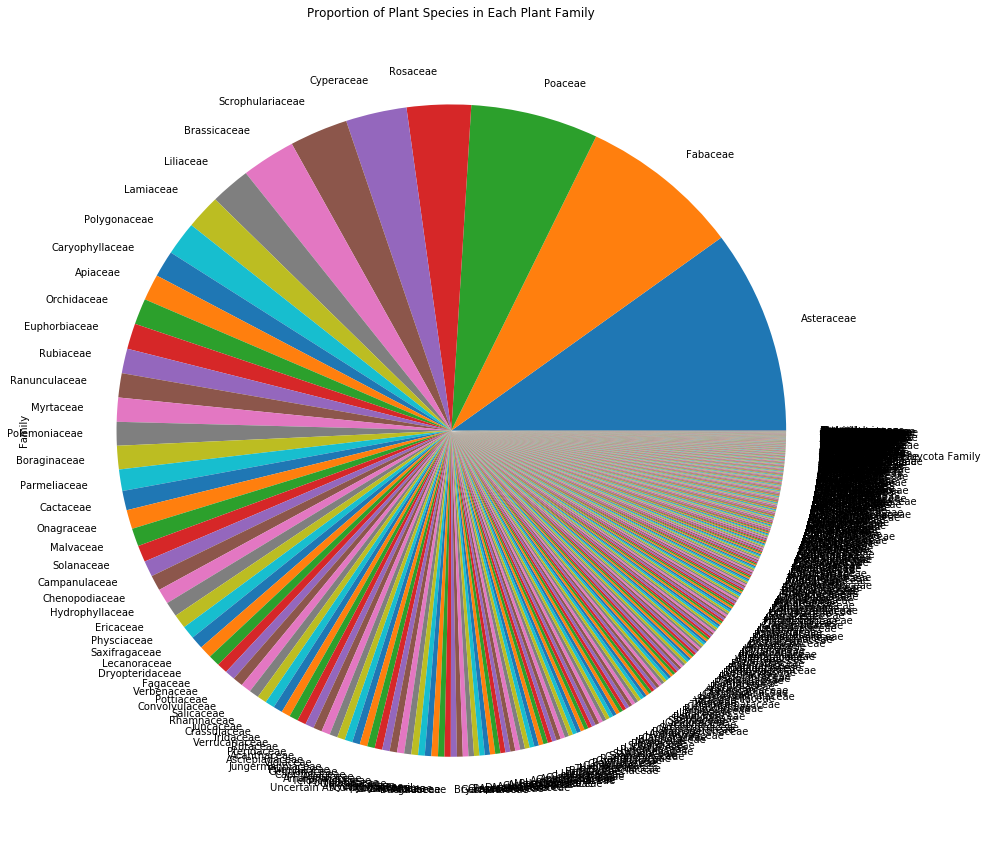

In [8]:
familyCounts.plot.pie(figsize=(15,15), title="Proportion of Plant Species in Each Plant Family", ax=None)

Unfortunately, with 547 plant families, the chart gets extremely crowded. Still, we can get a better feel than with pure numbers the proportion of the larger families relative to the whole.

Perhaps we want to know the distribution of plant family sizes, as in how many families are of a given size.

In [9]:
familyCounts.describe()

count     547.000000
mean       87.647166
std       327.769828
min         1.000000
25%         4.000000
50%        14.000000
75%        52.000000
max      4831.000000
Name: Family, dtype: float64

This data starts to show how different of a picture you can get with really skewed distributions, where the mean is so different from the median (mean ~887, median 14).

If we look at a histogram, we can get a better feel for how heavy the skewness is.

C:\Users\reide\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Histogram Distribution of Number of Species in Family')]

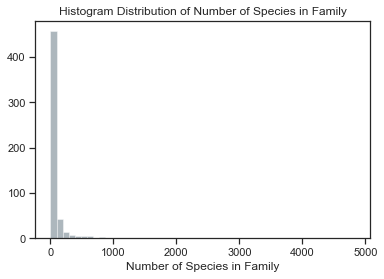

In [73]:
sns.set(style='ticks', palette="Blues_d")
sns.distplot(familyCounts, axlabel="Number of Species in Family", kde=False).set(title="Histogram Distribution of Number of Species in Family")

In [11]:
familyCounts.mode()

0    2
dtype: int64

Very clearly, the distribution is highly skewed the vast majority of families have very few members, with the mode being 2 species in a family.

We can see how that distribution can change when we increase the size of the bins.

[Text(0.5,1,'Histogram Distribution of Number of Species in Family')]

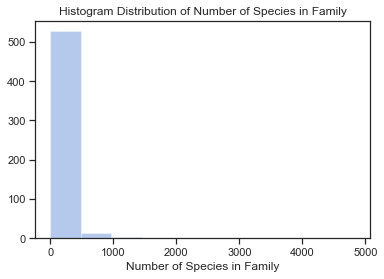

In [71]:
sns.distplot(familyCounts, axlabel="Number of Species in Family", bins=10, kde=False).set(title="Histogram Distribution of Number of Species in Family")

It doesn't help all that much.

Maybe looking at a boxplot would be more helpful.

[Text(0.5,0,'Number of Species per Family'),
 Text(0.5,1,'Boxplot Distribution of Number of Species per Family')]

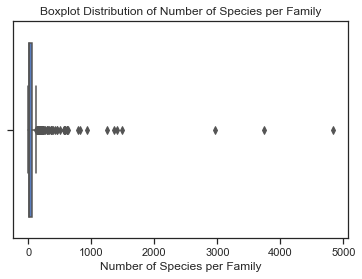

In [69]:
sns.boxplot(familyCounts).set(title='Boxplot Distribution of Number of Species per Family', xlabel="Number of Species per Family")

Same sort of problem: the data is super concentrated in the lower regions. Perhaps if we transform the data (with something like a natural log), we can get a better view.

C:\Users\reide\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Histogram Distribution of Log Number of Species in Family')]

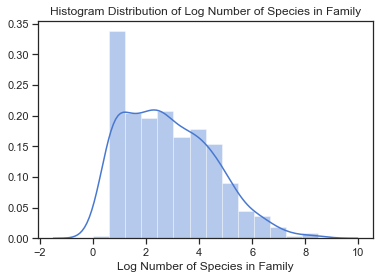

In [67]:
familyCountsLog = np.log(familyCounts)
sns.distplot(familyCountsLog, axlabel="Log Number of Species in Family", kde=True).set(title='Histogram Distribution of Log Number of Species in Family')

[Text(0.5,0,'Number of Species per Family (in Log)'),
 Text(0.5,1,'Boxplot Distribution of Log Number of Species in Family')]

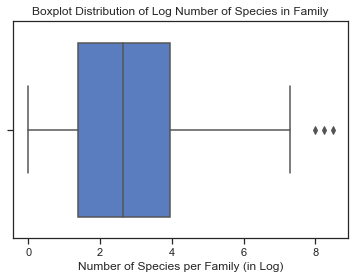

In [66]:
sns.boxplot(familyCountsLog).set(title="Boxplot Distribution of Log Number of Species in Family", xlabel="Number of Species per Family (in Log)")


Now that's better! We can tease out a little better what that distribution looks like with both a histogram and a boxplot of the logs of the data.

Since this dataset is almost entirely categorical data, there doesn't seem to be much else that I can do with it for the purpose of this assignment.

### JSON

I found a dataset on the current members of the US House of Representatives. I want to take a look at two things: which names are the most common, and how many women are there in the current House of Representatives?

In [36]:
import json
import requests
get_request = requests.get('https://www.govtrack.us/api/v2/role?current=true&role_type=representative&limit=438')
get_request.text

'{\n "meta": {\n  "limit": 438,\n  "offset": 0,\n  "total_count": 439\n },\n "objects": [\n  {\n   "caucus": null,\n   "congress_numbers": [\n    115,\n    116\n   ],\n   "current": true,\n   "description": "Resident Commissioner for Puerto Rico",\n   "district": 0,\n   "enddate": "2021-01-03",\n   "extra": {\n    "address": "1609 Longworth House Office Building; Washington DC 20515-5401",\n    "office": "1609 Longworth House Office Building"\n   },\n   "leadership_title": null,\n   "party": "Republican",\n   "person": {\n    "bioguideid": "G000582",\n    "birthday": "1976-08-05",\n    "cspanid": 67353,\n    "firstname": "Jenniffer",\n    "gender": "female",\n    "gender_label": "Female",\n    "lastname": "González-Colón",\n    "link": "https://www.govtrack.us/congress/members/jenniffer_gonzalez_colon/412723",\n    "middlename": "",\n    "name": "Commish. Jenniffer González-Colón [R-PR0]",\n    "namemod": "",\n    "nickname": "",\n    "osid": "N00037615",\n    "pvsid": null,\n    "sort

In [17]:
repsDict =  json.loads(get_request.text)
repsDict.keys()

dict_keys(['meta', 'objects'])

In [33]:
# Get a feel for how the nesting works, and what information is there.
repsDict['objects'][1]['person']

{'bioguideid': 'A000055',
 'birthday': '1965-07-22',
 'cspanid': 45516,
 'firstname': 'Robert',
 'gender': 'male',
 'gender_label': 'Male',
 'lastname': 'Aderholt',
 'link': 'https://www.govtrack.us/congress/members/robert_aderholt/400004',
 'middlename': 'B.',
 'name': 'Rep. Robert Aderholt [R-AL4]',
 'namemod': '',
 'nickname': '',
 'osid': 'N00003028',
 'pvsid': '441',
 'sortname': 'Aderholt, Robert (Rep.) [R-AL4]',
 'twitterid': 'Robert_Aderholt',
 'youtubeid': 'RobertAderholt'}

In [34]:
# Making sure I'm accessing the dict correctly to get the info I want before I do a for loop.
repsDict['objects'][1]['person']['firstname']

'Robert'

In [37]:
# Grab all the first names from each person
firstNames = []
for i in range(0, len(repsDict['objects'])):
    individualName = repsDict['objects'][i]['person']['firstname']
    firstNames.append(individualName)

firstNames

['Jenniffer',
 'Robert',
 'Rob',
 'Sanford',
 'Earl',
 'Kevin',
 'Michael',
 'Ken',
 'John',
 'Ed',
 'Steve',
 'Wm.',
 'James',
 'Tom',
 'Jim',
 'Elijah',
 'Danny',
 'Susan',
 'Peter',
 'Diana',
 'Rosa',
 'Mario',
 'Lloyd',
 'Michael',
 'Eliot',
 'Anna',
 'Kay',
 'Sam',
 'Raúl',
 'Alcee',
 'Steny',
 'Sheila',
 'Eddie',
 'Walter',
 'Marcy',
 'Ron',
 'Peter',
 'Steve',
 'James',
 'Rick',
 'John',
 'Barbara',
 'John',
 'Zoe',
 'Nita',
 'Frank',
 'Stephen',
 'Carolyn',
 'Betty',
 'James',
 'Gregory',
 'Jerrold',
 'Grace',
 'Richard',
 'Eleanor',
 'Devin',
 'Frank',
 'Bill',
 'Nancy',
 'Collin',
 'David',
 'Harold',
 'Mike',
 'Lucille',
 'C.',
 'Bobby',
 'Tim',
 'Linda',
 'Janice',
 'Adam',
 'David',
 'Robert',
 'F.',
 'José',
 'Brad',
 'John',
 'Michael',
 'Adam',
 'Christopher',
 'Bennie',
 'Mike',
 'Mac',
 'Michael',
 'Fred',
 'Nydia',
 'Peter',
 'Greg',
 'Maxine',
 'Joe',
 'Don',
 'George',
 'Jim',
 'Debbie',
 'Daniel',
 'Emanuel',
 'Jeff',
 'Brian',
 'Virginia',
 'Patrick',
 'Louie',
 

In [39]:
# Move into Series so we can get values counts
firstNames = pd.Series(firstNames)
firstNames.value_counts()

John         14
David        11
Michael       9
Tom           8
Mike          8
Mark          7
Bill          6
James         6
Steve         6
Jim           5
Paul          4
Joe           4
Debbie        4
Daniel        4
Greg          4
Brian         4
Peter         4
Andy          4
Scott         4
Robert        4
Anthony       3
Kevin         3
Sean          3
Doug          3
Tim           3
Adam          3
Chris         3
Ann           3
Donald        3
Ben           3
             ..
Denver        1
Katherine     1
Chellie       1
Diana         1
Collin        1
Darin         1
Aumua         1
Jody          1
Mario         1
Lucy          1
Suzanne       1
Walter        1
Danny         1
Ruben         1
Gilbert       1
Zoe           1
Jenniffer     1
Bennie        1
Max           1
Eddie         1
Rosa          1
Lucille       1
Bruce         1
Louie         1
Albio         1
Jerrold       1
Martha        1
Carol         1
Bryan         1
Sharice       1
Length: 279, dtype: int6

So, it looks like the top five are John, David, Michael, Tom, and Mike. Not surprisingly, these are all male names. The most common obviously female name is Debbie, coming in 13th place.

Let's take a look at the composition of the House by gender.

In [44]:
# Grab each person's gender
genders = []
for i in range(0, len(repsDict['objects'])):
    individualGender = repsDict['objects'][i]['person']['gender']
    genders.append(individualGender)
# Change to Series to get value counts
gendersSeries = pd.Series(genders, name="House of Representatives")
gendersSeries.value_counts()

male      332
female    106
Name: House of Representatives, dtype: int64

So, around 31.9% of the current U.S. House of Representatives is female. Let's compare that to the U.S. Senate, just for kicks.

In [41]:
# Grab the new file
get_requestSenate = requests.get('https://www.govtrack.us/api/v2/role?current=true&role_type=senator')
senatorsDict =  json.loads(get_requestSenate.text)
# Check if the layout is the same as the last JSON
senatorsDict['objects'][1]['person']['firstname']

'Susan'

In [43]:
# Grab each senator's gender
senateGenders = []
for i in range(0, len(senatorsDict['objects'])):
    individualGender = senatorsDict['objects'][i]['person']['gender']
    senateGenders.append(individualGender)
# Change to Series to get value counts
senateGendersSeries = pd.Series(senateGenders, name="Senate")
senateGendersSeries.value_counts()

male      75
female    25
Name: Senate, dtype: int64

Wow, exactly 25% of the senate is female. Let's look at the two in a stacked bar chart to check relative size.

In [52]:
# Store value counts into Series
senateGenderCounts = senateGendersSeries.value_counts()
houseGenderCounts = gendersSeries.value_counts()
# Create dataframe with both houses of Congress
congressGenderDf = pd.concat([houseGenderCounts, senateGenderCounts], axis=1)

#Transpose for the sake of the stacked bar graph
congressGenderDf = congressGenderDf.T
congressGenderDf

,male,female
House of Representatives,332,106
Senate,75,25


[Text(0,0.5,'Number of Members'), Text(0.5,0,'House of the U.S. Congress')]

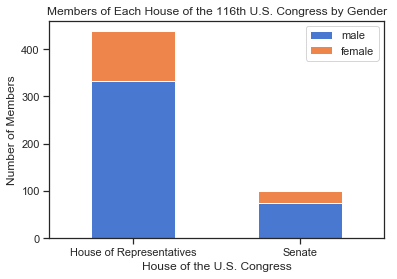

In [62]:
sns.set_palette('muted')
stackedBar = congressGenderDf.plot(kind="bar", title="Members of Each House of the 116th U.S. Congress by Gender", stacked=True, rot=0)
stackedBar.set(xlabel="House of the U.S. Congress", ylabel="Number of Members")

### Excel

I found weather data from a city in Brazil (Maranguape, CE) where I served my mission. The online system only allows you to pull data for 1 year at a time, so I choose to include a year-long interval that included my service of being there for six months.

In [85]:
excel_file = r"C:\Users\reide\Jupyter Notebooks\Homework\WeatherDataforMaranguape.xls"
maranguapeWeather = pd.read_excel(excel_file)
maranguapeWeather

,DataHora (GMT),DirVento (oNV ),Precipitacao (mm ),PressaoAtm (mB ),RadSolAcum (MJ/m2 ),TempAr (oC ),UmidRel (% ),VelVento (m/s )
0,2013-08-19 21:00:00,78,819.0,994.5,11.04,NaN,68.8,5.4
1,2013-08-19 18:00:00,147,0.0,993.4,7.09,NaN,40.0,6.0
2,2013-08-19 15:00:00,141,0.0,996.3,7.74,NaN,48.0,6.7
3,2013-08-19 12:00:00,135,0.0,998.2,3.70,NaN,60.8,6.1
4,2013-08-19 09:00:00,132,0.0,996.8,0.01,NaN,84.8,5.3
5,2013-08-19 06:00:00,111,0.0,995.9,0.00,NaN,80.0,4.4
6,2013-08-19 03:00:00,114,0.0,997.1,0.00,NaN,78.4,3.6
7,2013-08-19 00:00:00,99,0.0,997.2,0.00,NaN,89.6,3.3
8,2013-08-18 21:00:00,66,0.0,995.1,2.46,NaN,72.0,5.7
9,2013-08-18 18:00:00,90,0.0,993.8,7.60,NaN,51.2,4.2


Maybe we can try to look at what days it rained the most in the city. The nature of the data does not make it easy because it is for 3 hour intervals, not daily averages, and the last day doesn't have all 8 daily intervals.

C:\Users\reide\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


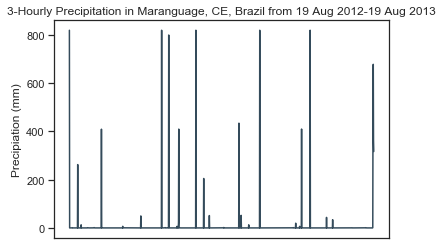

In [92]:
maranguapeWeather["Precipitacao (mm )"].plot.line().set(title="3-Hourly Precipitation in Maranguage, CE, Brazil from 19 Aug 2012-19 Aug 2013", ylabel="Precipiation (mm)")
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()

This data also isn't very well suited to this kind of graph because the date stamps are in a weird format. Let's look at the Relative Humidity Instead.When you run it over the whole time period, it get's very messy, so let's just look at the first week of the data.

[Text(0,0.5,'Percentage Humidity'),
 Text(0.5,1,'3-Hourly Relative Humidity in Maranguage, CE, Brazil from 19 Aug 2012 to 26 Aug 2013')]

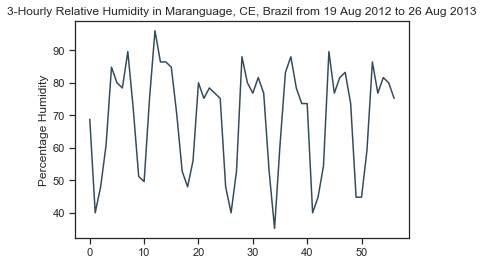

In [96]:
maranguapeWeather['UmidRel (% )'][:57].plot.line().set(title="3-Hourly Relative Humidity in Maranguage, CE, Brazil from 19 Aug 2012 to 26 Aug 2013", ylabel="Percentage Humidity")